Excercise 2

Discrete random variables
In the excercise you can use a build in procedure for generating
random numbers. Compare the results obtained in simulations with
expected results. Use histograms (and tests).
1. Choose a value for the probability parameter p in the geometric
distribution and simulate 10,000 outcomes. You can experiment
with a small, moderate and large value if you like.
2. Simulate the 6 point distribution with

    X 1 2 3 4 5 6

    pi 7/48 5/48 1/8 1/16 1/4 5/16

     (a) by applying a direct (crude) method 

     (b) by using the rejction method

     (c) by using the Alias method

3. Compare the three different methods using adequate criteria,
then discuss the results.
4. Give recommendations of how to choose the best suited
method in different settings, i.e., discuss the advantages and
drawbacks of each method. If time permits substantiate by
running experiments.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import floor
from scipy import stats
import time

In [27]:
def random_num (n,x_0,a,c,m): 
    random_number = []
    for i in range(n):
        x_i = (x_0 * a + c)%m
        x_0 = x_i
        random_number.append(x_i/m)
    return random_number

In [28]:
U = random_num (10000,9,1111,113,2**24)

In [29]:
#![image.png](attachment:image.png)

In [30]:
def geometric_distrubution(random_number,p):
    geom = [np.ceil(np.log(1-x) / np.log(1-p)) for x in random_number]
    return geom

In [31]:
np.mean(geometric_distrubution(U,0.02)), np.mean(np.random.geometric(p=0.02, size=10000))

(50.3121, 50.3023)

In [32]:
np.mean(geometric_distrubution(U,0.2)), np.mean(np.random.geometric(p=0.2, size=10000))

(5.0267, 4.9841)

In [33]:
np.mean(geometric_distrubution(U,0.4)), np.mean(np.random.geometric(p=0.4, size=10000))

(2.5079, 2.5166)

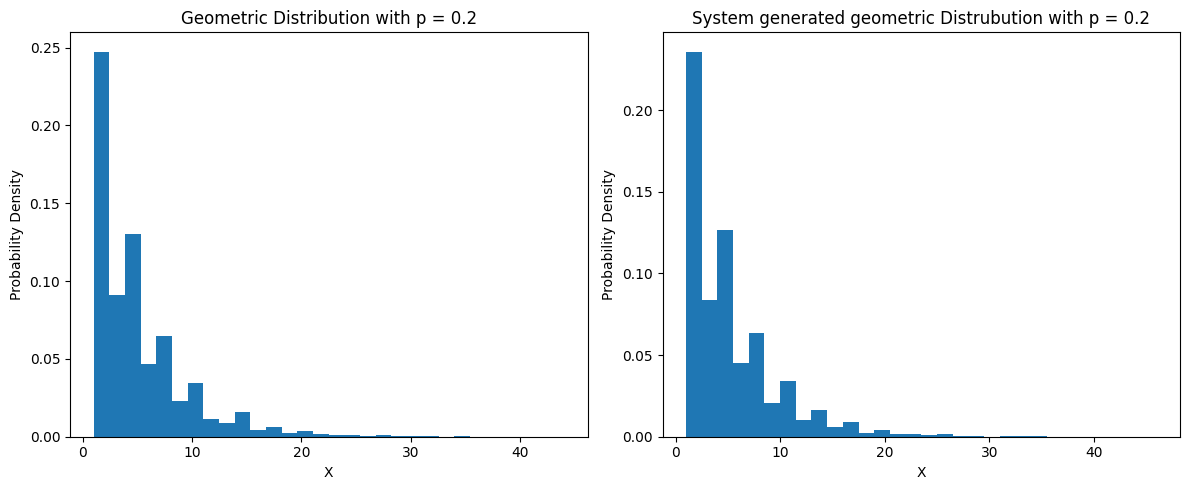

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
titles = ['Geometric Distribution with p = 0.2', 'System generated geometric Distrubution with p = 0.2']
axes[0].hist(geometric_distrubution(U,0.2), bins=30, density=True)
axes[0].set_title(titles[0])
axes[0].set_ylabel('Probability Density')
axes[0].set_xlabel('X')
axes[1].hist(np.random.geometric(p=0.2, size=10000), bins=30, density=True)
axes[1].set_title(titles[1])
axes[1].set_ylabel('Probability Density')
axes[1].set_xlabel('X')

plt.tight_layout()
plt.show()

NameError: name 'geometric_distribution' is not defined

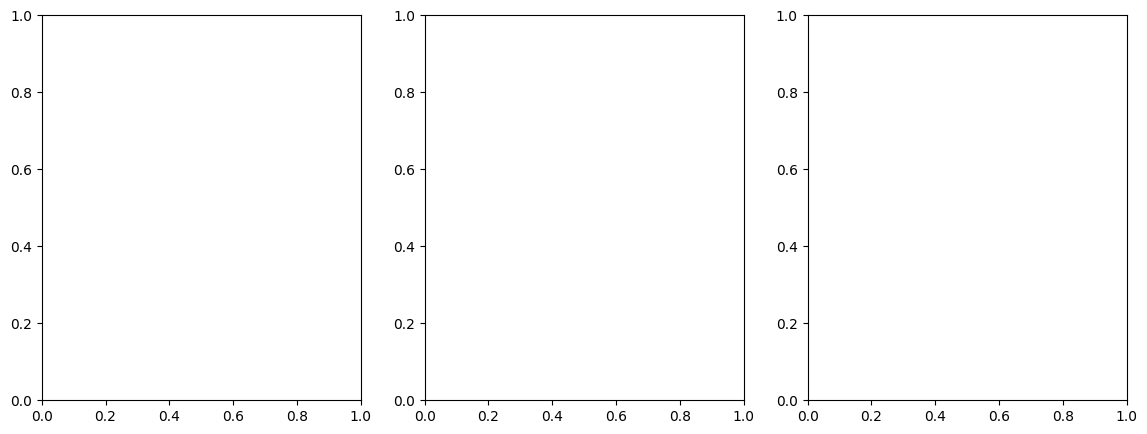

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))
p_values = [0.02, 0.2, 0.4]
titles = ['Geometric Distribution with p = 0.02', 'Geometric Distribution with p = 0.2', 'Geometric Distribution with p = 0.4']

for i, p in enumerate(p_values):
    X = geometric_distribution(U, p)
    axes[i].hist(X, bins=30, density=True)
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Probability Density')
    axes[i].set_xlabel('X')

plt.tight_layout()
plt.show()

# Our Coments:

From our experiment, we observed that our custom geometric function generated distributions consistently had slightly higher means compared to the geometric distributions generated by the built-in function for different values of p. For p values of 0.02, 0.2, and 0.4, we obtained mean values of 50.3121, 5.0267, and 2.5079, respectively, for our geometric distributions.

Analyzing the histograms above, we can observe that lower values of p result in smoother histograms.

# 2

In [ ]:
### given probability
p = [7/48, 5/48, 1/8, 1/16, 1/4,5/16]
PP = np.cumsum(p)

# a) Crude method

In [ ]:
u = np.random.uniform(0,1,10000)

In [ ]:
def catagoty(s,pp):
    if(s <= pp[0]): return 1
    elif(s <= pp[1]): return 2
    elif(s <= pp[2]): return 3
    elif(s <= pp[3]): return 4
    elif(s <= pp[4]): return 5
    else: return 6   

In [ ]:
def crude_method(u):
    x = []
    for i in u:
        x.append(catagoty(i,PP))
    return x


In [ ]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
#axes[0].hist(crude_method(u),bins =6,rwidth=0.85)
#axes[0].set_title('Crude method')
#axes[0].set_ylabel('Counts')
#axes[1].bar([1,2,3,4,5,6],[i*10000 for i in p])
#plt.show()

# b) Rejection method

In [ ]:
def rejection_method(pp,sample_size=10000):
    k = len(pp)
    c = max(pp)
    sample = []
    while len(sample) < sample_size:
        while(True):
            U1 = np.random.uniform(0,1,1)[0]
            U2 = np.random.uniform(0,1,1)[0]
            I=floor(U1*k)
            if (U2<=(pp[I])/c):
                sample.append(I)
                break
        x = []
    for i in u:
        x.append(catagoty(i,PP))
    return x
    return sample
        

In [ ]:
#sample = rejection_distribution(p)
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
#axes[0].hist(sample,bins =6,rwidth=0.85)
#axes[0].set_title('rejection method')
#axes[0].set_ylabel('Counts')
#axes[1].bar([1,2,3,4,5,6],[i*10000 for i in p])
#plt.show()

# c) Alias method

In [ ]:
def setup(p):
    L = [i for i in range(len(p))]
    F = [i*len(p) for i in p]
    G = [i for i in range(len(p)) if F[i]>=1]
    S = [i for i in range(len(p)) if F[i]<1]
    while(len(S)>0):
        i=G[0]
        j=S[0]
        L[j] = i
        F[i] = F[i]-(1-F[j])
        if (F[i]<1-1e-8):
            G.pop(0) #G = G[1:]
            S.append(i)
        S.pop(0)
    return (F,L)
            


In [ ]:
def alias_method(p, sample_size=10000):
    F ,L = setup(p)
    sample = []
    for i in range(sample_size):
        I = floor(len(p)*np.random.uniform(0,1,1)[0])
        if (np.random.uniform(0,1,1)[0]<= F[I]):
            sample.append(I)
        else:
            sample.append(L[I])
    return sample


In [ ]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
#axes[0].hist(alias_distribution(p),bins =6,rwidth=0.85)
#axes[0].set_title('rejection method')
#axes[0].set_ylabel('Counts')
#axes[1].bar([1,2,3,4,5,6],[i*10000 for i in p])
#plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
titles = ['Crude method', 'rejection_distribution','Alias method','Theoritical']

axes[0].hist(crude_method(u),bins =6,rwidth=0.85)
axes[0].set_title(titles[0])
axes[0].set_ylabel('Count')
axes[0].set_xlabel('X')

axes[1].hist(rejection_method(u), bins=6,rwidth=0.85)
axes[1].set_title(titles[1])
axes[1].set_xlabel('X')

axes[2].hist(alias_method(p),bins =6,rwidth=0.85)
axes[2].set_title(titles[2])
axes[2].set_xlabel('X')

axes[3].bar([1,2,3,4,5,6],[i*10000 for i in p])
axes[3].set_title(titles[3])
axes[3].set_xlabel('X')

plt.tight_layout()
plt.show()

# 3 Comparison all three method with run time:

In [ ]:
start_time = time.time()
u = np.random.uniform(0,1,10000)
crude_method(u)
end_time = time.time()
print("Time taken by Crude method:",end_time-start_time)
start_time = time.time()
u = np.random.uniform(0,1,10000)
rejection_distribution(u)
end_time = time.time()
print("Time taken by rejection Method:",end_time-start_time)
start_time = time.time()
u = np.random.uniform(0,1,10000)
alias_distribution(u)
end_time = time.time()
print("Time taken by alias method:",end_time-start_time)


# Our coments:

When we performed our sampling using three methods, we observed that the rejection method took the longest time, with a duration of 0.13438105583190918. The alias method followed with a time of 0.10035109519958496, and the Crude method had the shortest duration of 0.007367610931396484. This ordering is reasonable since the rejection method requires more computational steps compared to the other methods.